## The results below are for LoF and Mis3 with RR_mis3 = RR_lof/4

In [1]:
# Mutation rates (from real data) and parameters
# Note that we need two sets of parameters: one used for simulation, 
#the other used by TADA for scoring genes (those with the suffix "est")
source("TADA/TADA.R")
data <- read.csv("TADA/data/ASC_2231trios_1333trans_1601cases_5397controls.csv", header=TRUE, as.is=TRUE)
mu <- data$mut.rate
mu.frac <- c(0.074, 0.32)
pi <- 0.06
gamma.mean <- c(18, 5.4)
beta <- c(1, 0.5)
gamma.mean.est <- c(18, 5.4)
beta.est <- c(1, 0.5)

# Use simulation to assess the power of TADA.denovo
nr <- 10
rs <- numeric(nr)
N <- 550 #5050

rrListLoF <- c(4, seq(5, 50, by = 5))
rrListMis3 <- rrListLoF/4

power.mean <- numeric(length(N))
power.sd <- numeric(length(N))




    nr <- 25
rsOut <- matrix(0, nrow = nr, ncol = length(rrListLoF))
rsOutList <- list()

Ntime <- 10
for (ii in 1:length(rrListLoF)){

    gamma.mean <- c(rrListLoF[ii], rrListMis3[ii])
    gamma.mean.est <- c(rrListLoF[ii], rrListMis3[ii])
    
    
  rs <- replicate(nr, eval.TADA.denovo(N, mu, mu.frac, pi, 
                                       gamma.mean, beta, gamma.mean.est, beta.est, FDR=0.1))
  
    rsOut[, ii] <- rs
#    power.mean[ii] <- mean(rs)
#  power.sd[i] <- sd(rs)

#power.dn <- data.frame(mean=power.mean, sd=power.sd)
   
    }
#    rsOutList[[kk]] <- rsOut
 #   }
    

In [10]:
rrListLoF
rrListMis3

[1]  4  5 10 15 20 25 30 35 40 45 50

[1]  1.00  1.25  2.50  3.75  5.00  6.25  7.50  8.75 10.00 11.25 12.50

In [11]:
power.mean
rsOut

[1] 0

[,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11]
 [1,]    1    1    1    3    4   11   12   17   31    32    44
 [2,]    1    1    1    2    3   13   15   21   28    42    37
 [3,]    1    1    1    1    5   12   12   21   24    46    46
 [4,]    1    1    1    1    5    8   11   29   31    28    52
 [5,]    1    1    1    3    5    7   16   16   24    32    31
 [6,]    1    1    1    2    4    7   10   22   21    39    43
 [7,]    1    1    1    1    7    9   18   25   27    32    51
 [8,]    1    1    1    2    3    9   10   24   38    50    27
 [9,]    1    1    1    1    8    9   15   22   27    32    43
[10,]    1    1    1    1    7    5   15   16   21    29    38
[11,]    1    1    1    1    1   11   21   22   30    37    52
[12,]    1    1    1    1    3   12   12   14   20    39    38
[13,]    1    1    1    3    6   15   16   23   19    33    57
[14,]    1    1    1    1   11    8   11   16   20    39    44
[15,]    1    1    1    3    8   12   11   19   36    36    36
[16,]    1    1    1    5    6   13   14   13   29    28    30
[17,]    1    1    1    3    5    6   16   22   29    39    51
[18,]    1    1    1    1    3    8   10   16   21    31    29
[19,]    1    1    1    1    6    9    4   19   34    24    47
[20,]    1    1    1    1    1    5   17   24   17    39    35
[21,]    1    1    1    1    1   13   14   20   20    36    30
[22,]    1    1    1    1    5    7   17   18   25    31    34
[23,]    1    1    1    1    4    8    7   18   27    35    38
[24,]    1    1    1    3    3   14   21   24   30    38    37
[25,]    1    1    1    3    4    4   12   20   33    46    30

In [13]:
gamma.mean
gamma.mean.est

[1] 50.0 12.5

[1] 50.0 12.5

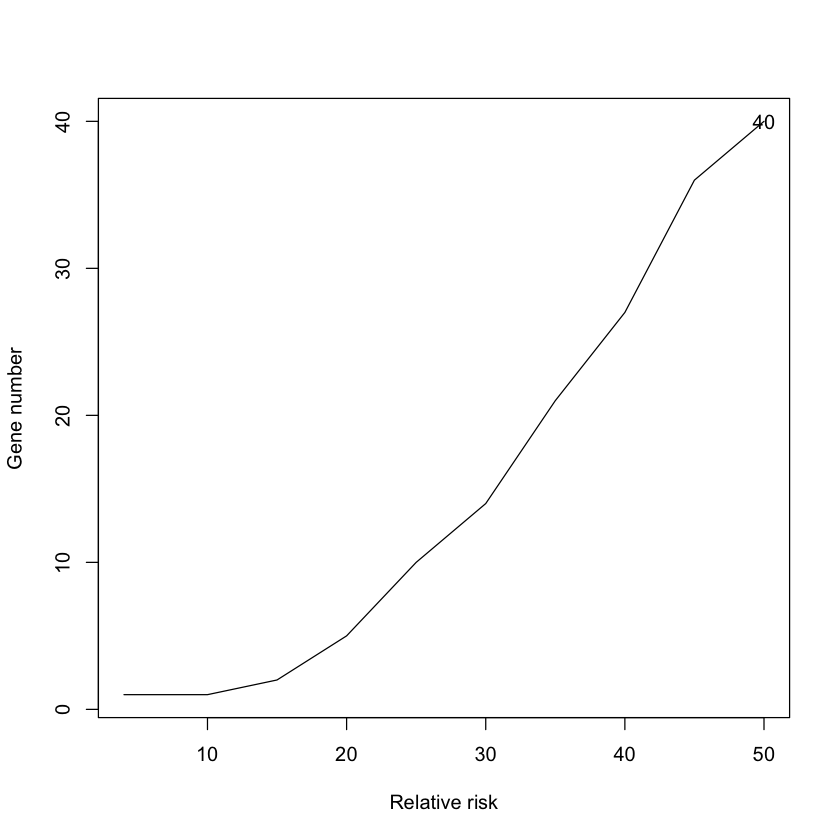

In [14]:
geneCount <- apply(rsOut, 2, function(y) ceiling(mean(y)))

plot(rrListLoF, geneCount, xlab = 'Relative risk', ylab = 'Gene number', col = 'white')
lines(rrListLoF, geneCount)
text(rrListLoF[length(rrListLoF)], geneCount[length(geneCount)], geneCount[length(geneCount)])

## Simulate for different FDRs (100 times for each)

V1 V2 V3
1  1  1  3
2  1  1  1
3  1  1  2

4 5 10 15 20 25 30  35  40  45  50
[1,] 1 1  1  1  3  5  9  14  19  25  32
[2,] 1 1  1  2  5  8 13  19  26  34  42
[3,] 1 1  2  6 13 29 57 101 130 152 177

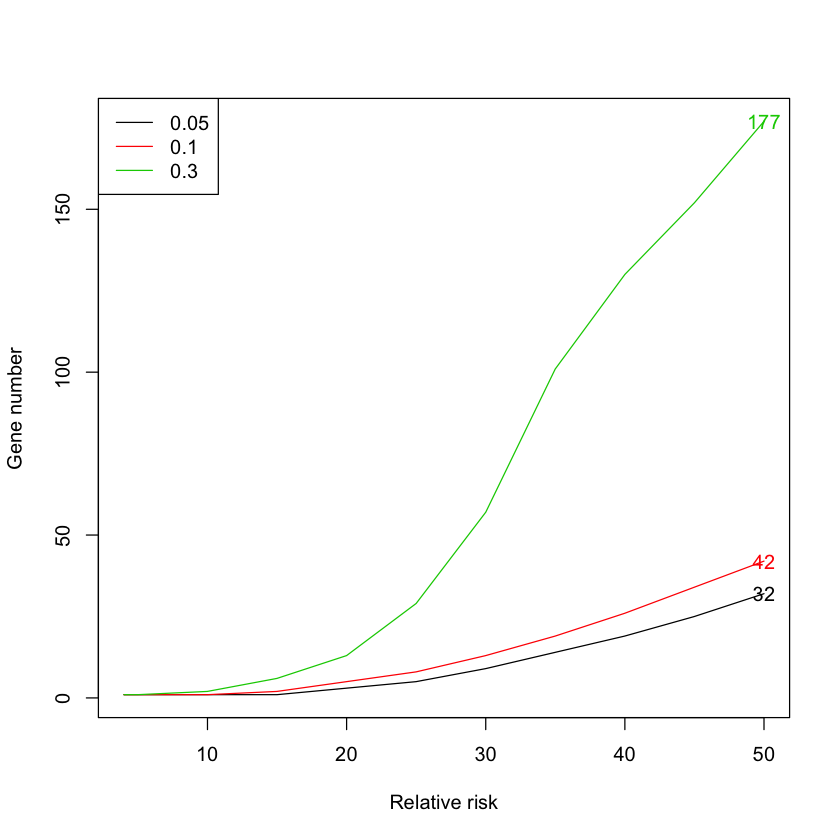

In [32]:
fdr0 <- c(0.05, 0.1, 0.3)

resultFDR <- matrix(0, ncol = length(rrListLoF), nrow = length(fdr0))


for (j1 in 1:length(fdr0)){
    b1 <- read.table(paste("Test_power/final.result.fdr.", fdr0[j1], ".txt", sep = ""), header = FALSE)
    resultFDR[j1, ] <- apply(b1, 2, function(y) round(mean(y), 0))
    
   
}

plot(range(rrListLoF), range(as.numeric(resultFDR)), col = 'white', xlab = 'Relative risk',
    ylab = 'Gene number')
for (j2 in 1:length(fdr0)){
 lines(rrListLoF, resultFDR[j2, ], col = j2)
    text(rrListLoF[length(rrListLoF)], resultFDR[j2, dim(resultFDR)[2]], 
         resultFDR[j2, dim(resultFDR)[2]], col = j2 )
    }
    legend("topleft", legend = fdr0, col = 1:length(fdr0), lty = 1)
    
b1[1:3, 1:3]
colnames(resultFDR) <- rrListLoF
resultFDR

In [3]:
mu.frac <- c(0.074, 0.32)
gamma.mean.dn <- c(20, 4.7)
beta.dn <- c(1,1)
gamma.mean.CC <- c(2.3, 1.00)
beta.CC <- c(4.0, 1000)
rho1 <- c(0.1, 0.5)
nu1 <- c(200, 100)
rho0 <- c(0.1, 0.5)
nu0 <- c(200, 100)
hyperpar <- as.array(rbind(gamma.mean.dn, beta.dn, gamma.mean.CC, beta.CC, rho1, nu1, rho0, nu0))
l <- 100
pi0 <- 0.94 # the fraction of non-risk genes
data <- read.csv("TADA/data/ASC_2231trios_1333trans_1601cases_5397controls.csv", header=TRUE, as.is=TRUE)
ntrio <- 2231  # number of trios
ncase <- 1601  # number of cases
nctrl <- 5397  # number of controls
ntrans <- 1333 # number of subjects with transmission data
N <- list(dn=ntrio, ca=ntrans+ncase, cn=ntrans+nctrl)

# Running TADA
counts <- as.array(cbind(data$dn.LoF, data$case.LoF+data$trans.LoF, data$ctrl.LoF+data$ntrans.LoF, data$dn.mis3, data$case.mis3+data$trans.mis3, data$
ctrl.mis3+data$ntrans.mis3))
rs <- TADA(counts, N, data$mut.rate, mu.frac, hyperpar)
data$BF <- rs$BF.total

# Estimating p-values of BFs (this is optional and slow)
system.time(rsp <- TADAp(counts, N, data$mut.rate, mu.frac, hyperpar, l=100))
data$pval.TADA <- rsp$pval


   user  system elapsed 
414.331   4.421 419.988 

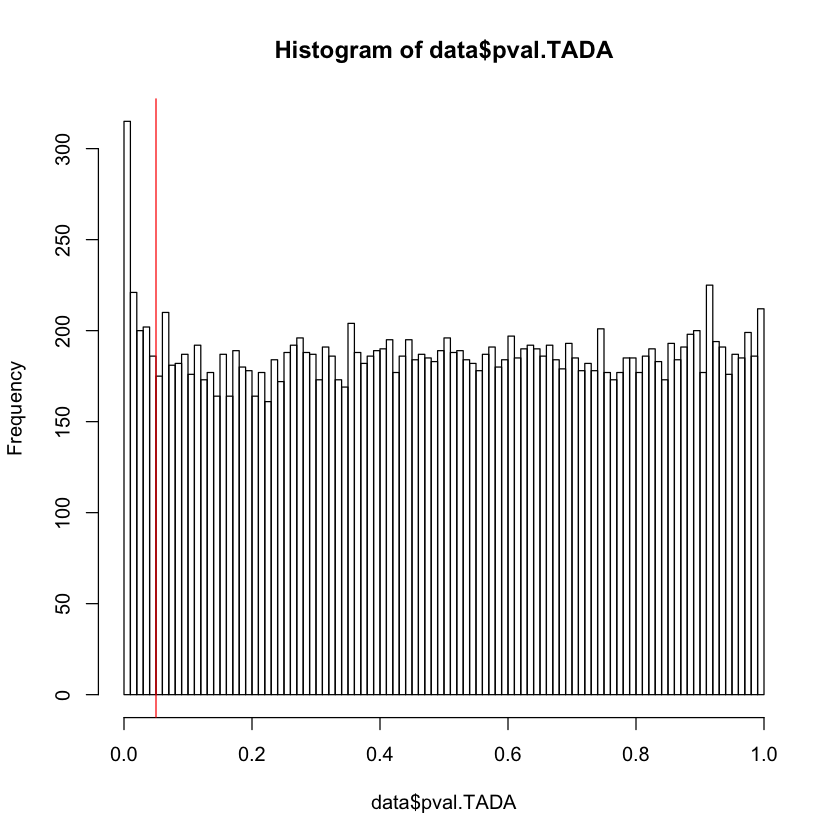

In [4]:
hist(data$pval.TADA, 100)
abline(v = 0.05, col = 'red')

In [6]:
# Running TADA-denovo
counts.dn <- as.array(cbind(data$dn.LoF, data$dn.mis3))
rs.dn <- TADA.denovo(counts.dn, ntrio, data$mut.rate, mu.frac, gamma.mean.dn, beta.dn)
data$BF.dn<- rs.dn$BF.total

# Estimating p-values of BFs (optional and slow)
rsp.dn <- TADAp.denovo(counts.dn, ntrio, data$mut.rate, mu.frac, gamma.mean.dn, beta.dn, l=l)
data$pval.TADA.dn <- rsp.dn$pval

# FDR estimation
data <- data[order(-data$BF.dn),]
data$qvalue.dn <- Bayesian.FDR(data$BF.dn, pi0)$FDR


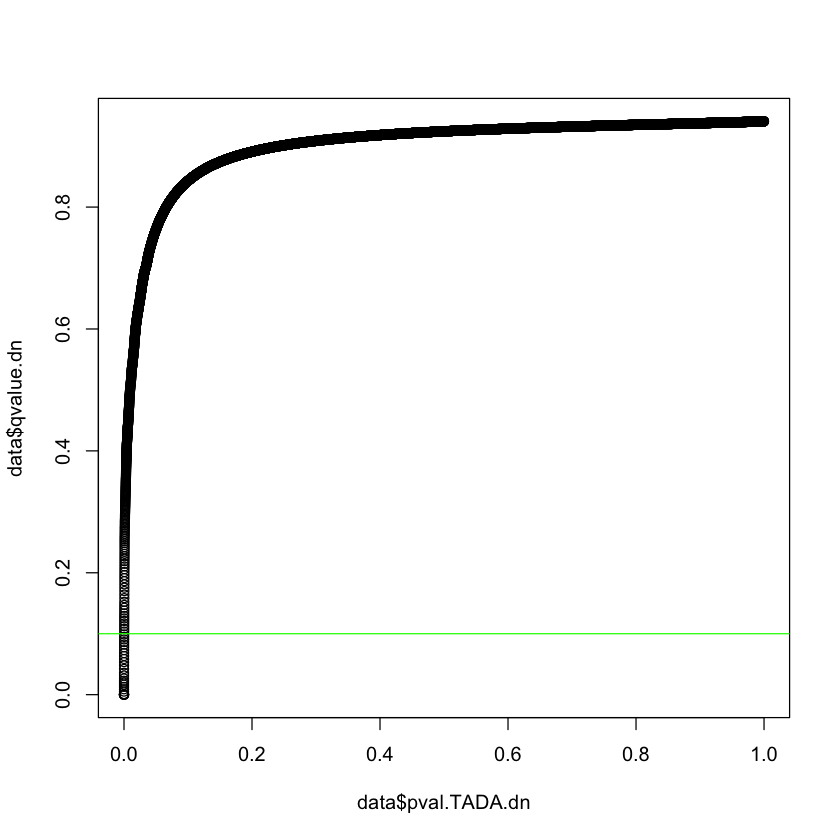

In [8]:
plot(data$pval.TADA.dn , data$qvalue.dn)
abline(h = 0.1, col = 'green')

In [9]:
data1 <- data[data$qvalue.dn < 0.1, ]

range(data1$pval.TADA.dn)

[1] 2.668802e-07 2.503336e-04

In [15]:
data2 <- data[data$qvalue.dn < 0.3, ]

range(data2$pval.TADA.dn)

[1] 2.668802e-07 1.705364e-03